In [1]:
import warnings
warnings.filterwarnings('ignore')
from pos import *

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set("talk",font_scale=3)

In [3]:
def get_results(nu,g,s0):
    try:
        if g == 0:
            folder ="new_nu_"+str(nu)
            porcentaje_crimen=np.array([0.34,0.33,0.33])
        else:
            folder ="n_0"+str(int(nu*10))
            porcentaje_crimen=np.array([0.5,0.3,0.2])

        solucion=np.load(folder+"/solucion_sg__g_m_v.npy")
        n=100
        crimen=3
        tipo="sg"
        modelo="g_m_v"
        dist_crimn=dist_crimen(crimen=crimen,n=n,porcentaje=porcentaje_crimen)
        vecinos=convert_state_to_vecinos(state=solucion,dist_crimen=dist_crimn,n=n)
        G=convert_vertices_to_graph(vecinos)
        M=plot(modelo=modelo,s=s0,nu=nu,vertices=vecinos,legends={"A":"Immune","B":"Susceptible","C":"Highly Susceptible"})
        A=assor(G)
        matrix=mixing_matrix(G)
        
    except:
        M=0
        A=0
        matrix=np.zeros((3,3))

    return "{0:.2f}".format(M), "{0:.2f}".format(A), matrix   
    

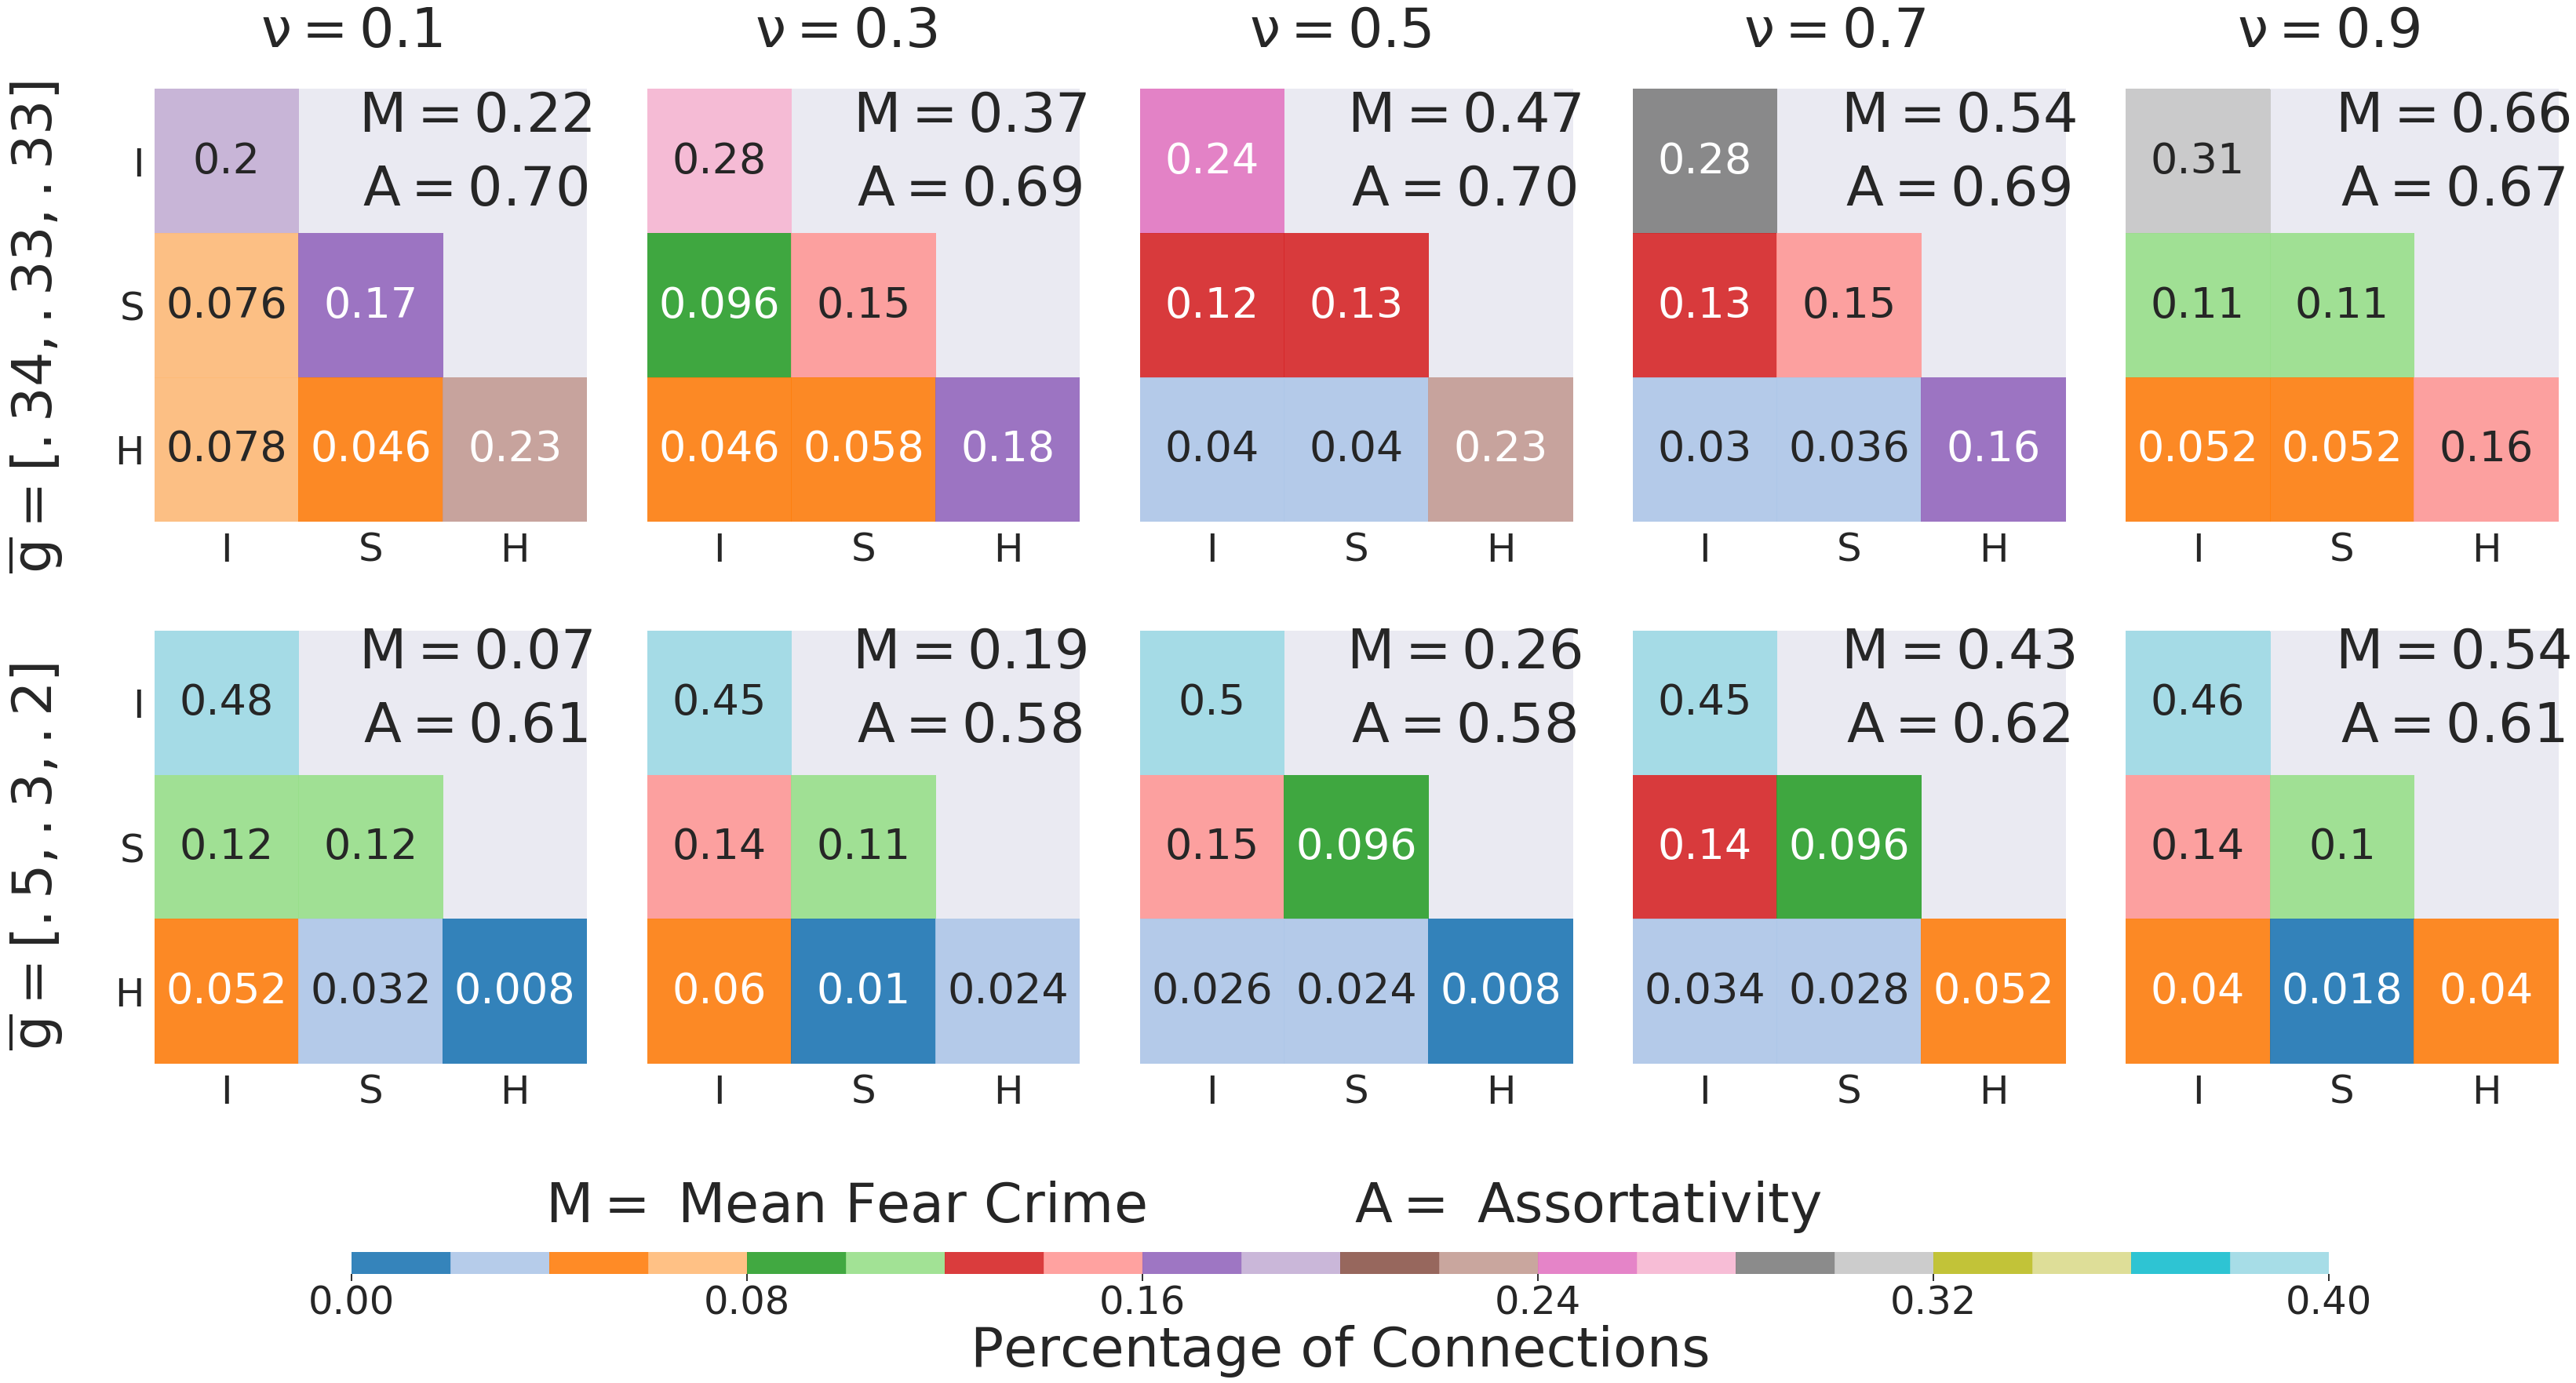

In [6]:

fig, axes = plt.subplots(2,5,figsize=(50,20),sharey=True)
cbar_ax = fig.add_axes([0.1, -0.1, 0.7, 0.02])
cbar_ax.xaxis.label.set_size(70)

nu=[0.1,0.3,0.5,0.7,0.9]
for idx, val in enumerate(nu):
    plt.text(0+idx*0.10, 22, r'$\nu='+str(val)+'$', fontsize = 70, horizontalalignment='center', verticalalignment='center')    

plt.text(-0.07, 10, r'$\overline{g}=[.5,.3,.2]$', fontsize = 70,rotation=90)
plt.text(-0.07, 20.3, r'$\overline{g}=[.34,.33,.33]$', fontsize = 70,rotation=90)

plt.text(0.1, 1.2, r'$M=$ Mean Fear Crime', fontsize = 70, horizontalalignment='center', verticalalignment='center')    
plt.text(0.25, 1.2, r'$A=$ Assortativity', fontsize = 70, horizontalalignment='center', verticalalignment='center')    

    
s0=np.random.rand(100)

mask = np.zeros((3,3))
mask[(np.array([0, 0, 1]), np.array([ 1, 2, 2]))] = True

labels=["I","S","H"]

with sns.axes_style("white"):
    for i, ax in enumerate(axes.flat):
        
        if i <= 4: 
            p0=20.5   
            g=0
        else:
            p0=11
            g=1
        
        M,A,matrix=get_results(nu[i%5],g,s0)
        plt.text(0.025+(i%5)*0.10, p0, r'$M='+str(M)+'$', fontsize = 70,horizontalalignment='center', verticalalignment='center')
        plt.text(0.025+(i%5)*0.10, p0-1.3, r'$A='+str(A)+'$', fontsize = 70,horizontalalignment='center', verticalalignment='center')
        
        
        
        g=sns.heatmap(matrix, ax=ax,
                    cbar=i == 0,
                    vmin=0, vmax=0.4,
                    square=True,
                    mask=mask,
                    cmap="tab20",
                    annot=True,
                    xticklabels=labels,
                    yticklabels=labels,
                    alpha=0.9,
                    cbar_kws={'label': 'Percentage of Connections',"orientation": "horizontal"},
                    cbar_ax=None if i else cbar_ax)
        g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 50)
        g.set_yticklabels(g.get_xticklabels(), rotation = 0, fontsize = 50)
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig("summarize_1.pdf",bbox_inches='tight')
fig.show()

